## Historical Station Price Data Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
import datetime as dt
%matplotlib inline

## Step1 :
 - Preprocessing -- load dataset and data cleaning 
 - Visualize the dataset
 

In [2]:
## laod the dataset
data_prices = pd.read_csv('prices.csv',delimiter=";")
data_stations = pd.read_csv('stations.csv',delimiter=";")

In [3]:
## rename column name for merging both dataset
data_prices = data_prices.rename(columns={'STID': 'ID'})

In [4]:
data_prices['DATE'] = data_prices['DATE_CHANGED']
data_prices['DATE'] = pd.to_datetime(data_prices['DATE'])
data_prices['DATE'] = data_prices['DATE'].dt.date




In [5]:
min(data_prices['DATE'])



datetime.date(2014, 6, 8)

In [6]:
max(data_prices['DATE'])


datetime.date(2015, 9, 29)

In [10]:
data_prices.head()

,ID,E5,E10,DIESEL,DATE_CHANGED,CHANGED,DATE
0,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589,1549,1389,2014-10-02 05:22:01.000000,21,2014-10-02
1,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1369,2014-10-02 05:26:01.000000,21,2014-10-02
2,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1359,2014-10-02 09:06:01.000000,1,2014-10-02
3,01bf5a06-4248-43a5-9524-56123fa3ab2f,1539,1499,1339,2014-10-03 12:14:01.000000,21,2014-10-03
4,01bf5a06-4248-43a5-9524-56123fa3ab2f,1529,1489,1329,2014-10-03 14:14:01.000000,21,2014-10-03


In [11]:
data_stations.head()


,ID,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
0,d37bee76-91b6-485a-b974-24f1b0d391fa,4,2015-01-09 10:26:15.000000,Aral Tankstelle,ARAL,An der Tagweide,2,76139,Karlsruhe,\N,49.020280,8.459429
1,51d4b652-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET MANNHEIM UNTERMUEHLAUSTRASSE 83,JET,UNTERMUEHLAUSTRASSE 83,\N,68169,MANNHEIM,\N,49.508962,8.467691
2,c7caf231-0e47-40db-92de-9349a2eb2bef,4,2014-09-26 13:24:57.000000,Aral Tankstelle,ARAL,Trippstadter Straße,69,67663,Kaiserslautern,\N,49.433754,7.757465
3,51d4b53b-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET KAISERSLAUTERN PARISER STR. 167,JET,PARISER STR. 167,\N,67655,KAISERSLAUTERN,\N,49.442200,7.748360
4,51d4b70f-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET GERMERSHEIM MUENCHENER STRASSE 12,JET,MUENCHENER STRASSE 12,\N,76726,GERMERSHEIM,\N,49.226800,8.374400


In [12]:
data_stations.shape

(824, 12)

In [13]:
data_prices.shape

(2189526, 7)

In [14]:
data_stations.describe()


,VERSION,LAT,LNG
count,824.000000,824.000000,824.000000
mean,131.427184,49.322226,8.191227
std,269.682766,0.254722,0.283228
min,1.000000,48.800790,7.505350
25%,1.000000,49.106052,8.106655
50%,4.000000,49.374500,8.289707
75%,22.250000,49.509410,8.404923
max,881.000000,49.799397,8.499941


In [15]:
data_prices.describe()

,E5,E10,DIESEL,CHANGED
count,2.189526e+06,2.189526e+06,2.189526e+06,2.189526e+06
mean,1.434320e+03,1.404088e+03,1.247491e+03,1.871165e+01
std,2.091502e+02,2.116844e+02,1.037774e+02,8.031150e+00
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00
25%,1.379000e+03,1.349000e+03,1.169000e+03,2.100000e+01
50%,1.459000e+03,1.429000e+03,1.239000e+03,2.100000e+01
75%,1.529000e+03,1.499000e+03,1.324000e+03,2.100000e+01
max,9.999000e+03,9.999000e+03,1.129000e+04,6.300000e+01


In [16]:
data_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2189526 entries, 0 to 2189525
Data columns (total 7 columns):
ID              object
E5              int64
E10             int64
DIESEL          int64
DATE_CHANGED    object
CHANGED         int64
DATE            object
dtypes: int64(4), object(3)
memory usage: 116.9+ MB


In [17]:
data_stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 12 columns):
ID                           824 non-null object
VERSION                      824 non-null int64
VERSION_TIME                 824 non-null object
NAME                         824 non-null object
BRAND                        802 non-null object
STREET                       820 non-null object
HOUSE_NUMBER                 674 non-null object
POST_CODE                    820 non-null object
PLACE                        820 non-null object
PUBLIC_HOLIDAY_IDENTIFIER    824 non-null object
LAT                          824 non-null float64
LNG                          824 non-null float64
dtypes: float64(2), int64(1), object(9)
memory usage: 77.3+ KB


In [18]:
updated_data= pd.merge(data_prices,data_stations, on='ID', how='inner')


In [19]:
updated_data.head()

,ID,E5,E10,DIESEL,DATE_CHANGED,CHANGED,DATE,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
0,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589,1549,1389,2014-10-02 05:22:01.000000,21,2014-10-02,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847
1,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589,1549,1389,2014-10-02 05:22:01.000000,21,2014-10-02,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847
2,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1369,2014-10-02 05:26:01.000000,21,2014-10-02,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847
3,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1369,2014-10-02 05:26:01.000000,21,2014-10-02,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847
4,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1359,2014-10-02 09:06:01.000000,1,2014-10-02,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847


In [20]:
updated_data.shape

(4379052, 18)

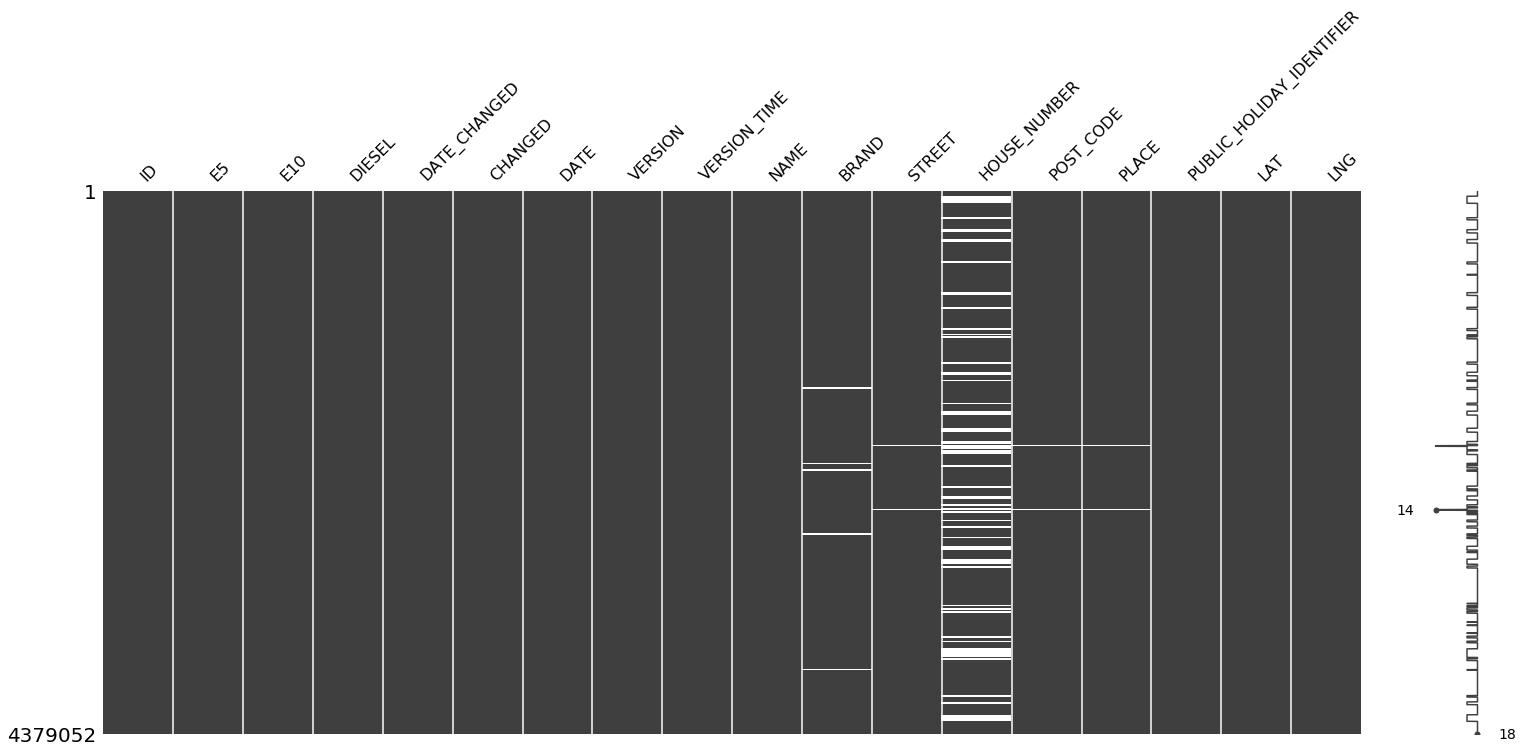

In [21]:
ms.matrix(updated_data)

In [22]:
## We dont need housnumber in our model so we drop this column
updated_data.drop('HOUSE_NUMBER',axis=1,inplace=True)

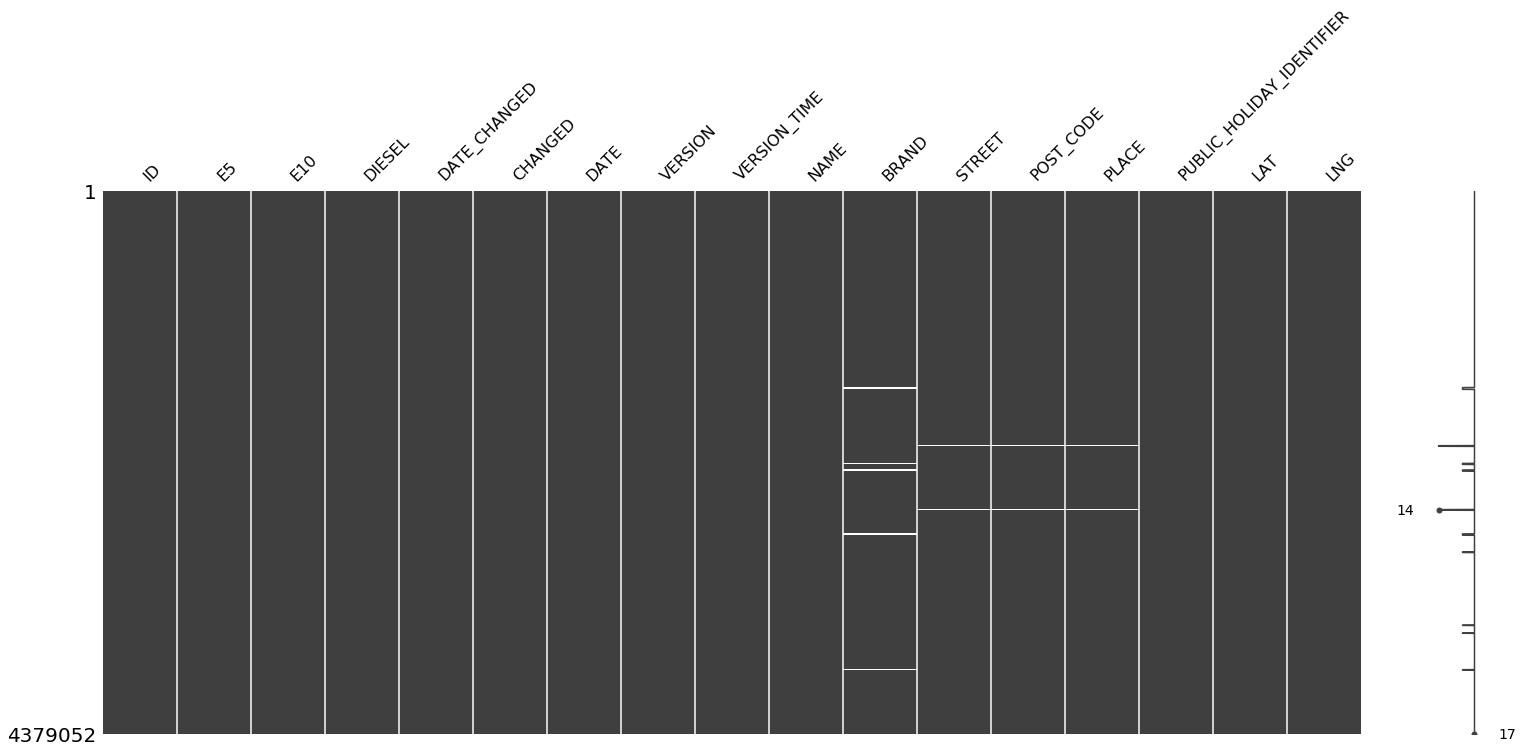

In [23]:
ms.matrix(updated_data)

## Show unique Brands and Place

In [24]:
updated_data.BRAND.unique()


array(['ESSO', 'ARAL', 'Supermarkt-Tankstelle', 'Shell',
       'Tankstelle Heinz', 'JET', 'Total', 'AVIA', 'Preis', 'Markant',
       'Frühmesser GmbH', 'TAMOIL', 'bft',
       'Supermarkt-Tankstelle am real- Markt', 'Mr. Wash Autoservice AG',
       'HEM', '\\N', 'Schuster & Sohn KG', 'Tankcenter', 'SB Markt', 'T',
       'E Center', 'BFT', 'Markenfreie TS', 'TOP', 'Freie',
       'Eberhardt Jöhlingen', 'mtb', nan, 'CLASSIC', 'Fritz Walter GmbH',
       'freie Tankstelle', 'Agip', 'TS ARNT', 'frei', 'OMV', 'Bft', 'rnt',
       'nicht mehr aktiv',
       'AUTO ZOTZ Landau in der Pfalz   Tanken und waschen', 'SB',
       'Freie Tankstelle', 'TOTAL', 'ELAN',
       'AUTO ZOTZ Herxheim b.LD.       Tanken an L.493',
       'SB-Markttankstelle', 'ZG Raiffeisen Energie', 'ED',
       'Sefrin Heizöl & Kraftstoffe', 'Supermarkt Tankstelle',
       'Raiffeisen Tankstelle', 'OIL!', 'Winkler', 'Tankhof Iffezheim',
       'Schiffer & Nicklaus GmbH', 'Raiffeisen'], dtype=object)

In [25]:
updated_data.PLACE.unique()


array(['WORMS', 'Kirchheimbolanden', 'Mannheim', 'LUDWIGSHAFEN OGGERSHEIM',
       'RAMSTEIN', 'EISENBERG', 'Neustadt', 'Hochstadt', 'Kandel',
       'Karlsruhe', 'MONSHEIM', 'MANNHEIM', 'Freinsheim', 'Hatzenbühl',
       'Fischbach', 'Ettlingen', 'Frankenthal', 'Gernsheim',
       'Limburgerhof', 'Annweiler-Queichhambach', 'HASSLOCH', 'GAGGENAU',
       'KARLSRUHE', 'KAISERSLAUTERN', 'SCHWEGENHEIM', 'Speyer', 'Landau',
       'Durmersheim', 'SPEYER', 'Thaleischweiler-Fröschen', 'Bad Dürkheim',
       'BÖHL-IGGELHEIM', 'FRANKENTHAL', 'MUTTERSTADT', 'Herxheim',
       'Kuppenheim', 'LUDWIGSHAFEN', 'Baden-Baden', 'Marxzell',
       'Ludwigshafen', 'Phillipsburg', 'Edenkoben', 'Waldsee', 'LANDAU',
       'Kaiserslautern', 'Landstuhl', 'Karlsruhe-Knielingen', 'Haßloch',
       'Alzey', 'Karlsbad', 'LANDSTUHL', 'MUGGENSTURM', 'ROEMERBERG',
       'Rohrbach bei Landau', 'Worms', 'RUELZHEIM',
       'Ettlingen OT Schöllbronn', 'NEUSTADT', 'PHILIPPSBURG', 'RASTATT',
       'GERMERSHEIM', 'Osth

In [26]:
## sort by location and gas stations
updated_data.sort_values(['PLACE', 'BRAND'])

,ID,E5,E10,DIESEL,DATE_CHANGED,CHANGED,DATE,VERSION,VERSION_TIME,NAME,BRAND,STREET,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
3690668,0e31a3fd-c450-4a29-923d-70343d7b1883,1479,1459,1259,2015-04-19 10:50:01.000000,20,2015-04-19,1,2013-07-31 22:00:00.000000,ALZEY BAHNHOFSTR,Shell,BAHNHOFSTR. 81,55232,ALZEY,\N,49.746800,8.10681
3690669,0e31a3fd-c450-4a29-923d-70343d7b1883,1479,1459,1259,2015-04-19 10:50:01.000000,20,2015-04-19,1,2013-07-31 22:00:00.000000,ALZEY BAHNHOFSTR,Shell,BAHNHOFSTR. 81,55232,ALZEY,\N,49.746800,8.10681
3690670,0e31a3fd-c450-4a29-923d-70343d7b1883,1459,1439,1229,2015-04-20 12:26:01.000000,21,2015-04-20,1,2013-07-31 22:00:00.000000,ALZEY BAHNHOFSTR,Shell,BAHNHOFSTR. 81,55232,ALZEY,\N,49.746800,8.10681
3690671,0e31a3fd-c450-4a29-923d-70343d7b1883,1459,1439,1229,2015-04-20 12:26:01.000000,21,2015-04-20,1,2013-07-31 22:00:00.000000,ALZEY BAHNHOFSTR,Shell,BAHNHOFSTR. 81,55232,ALZEY,\N,49.746800,8.10681
3690672,0e31a3fd-c450-4a29-923d-70343d7b1883,1459,1439,1229,2015-04-21 12:26:01.000000,21,2015-04-21,1,2013-07-31 22:00:00.000000,ALZEY BAHNHOFSTR,Shell,BAHNHOFSTR. 81,55232,ALZEY,\N,49.746800,8.10681
3690673,0e31a3fd-c450-4a29-923d-70343d7b1883,1459,1439,1229,2015-04-21 12:26:01.000000,21,2015-04-21,1,2013-07-31 22:00:00.000000,ALZEY BAHNHOFSTR,Shell,BAHNHOFSTR. 81,55232,ALZEY,\N,49.746800,8.10681
3690674,0e31a3fd-c450-4a29-923d-70343d7b1883,1449,1429,1219,2015-04-22 16:10:01.000000,21,2015-04-22,1,2013-07-31 22:00:00.000000,ALZEY BAHNHOFSTR,Shell,BAHNHOFSTR. 81,55232,ALZEY,\N,49.746800,8.10681
3690675,0e31a3fd-c450-4a29-923d-70343d7b1883,1449,1429,1219,2015-04-22 16:10:01.000000,21,2015-04-22,1,2013-07-31 22:00:00.000000,ALZEY BAHNHOFSTR,Shell,BAHNHOFSTR. 81,55232,ALZEY,\N,49.746800,8.10681
3690676,0e31a3fd-c450-4a29-923d-70343d7b1883,1429,1409,1209,2015-04-22 17:34:01.000000,21,2015-04-22,1,2013-07-31 22:00:00.000000,ALZEY BAHNHOFSTR,Shell,BAHNHOFSTR. 81,55232,ALZEY,\N,49.746800,8.10681
3690677,0e31a3fd-c450-4a29-923d-70343d7b1883,1429,1409,1209,2015-04-22 17:34:01.000000,21,2015-04-22,1,2013-07-31 22:00:00.000000,ALZEY BAHNHOFSTR,Shell,BAHNHOFSTR. 81,55232,ALZEY,\N,49.746800,8.10681


In [27]:
updated_data.shape


(4379052, 17)

In [29]:
updated_data.describe()


,E5,E10,DIESEL,CHANGED,VERSION,LAT,LNG
count,4.379052e+06,4.379052e+06,4.379052e+06,4.379052e+06,4.379052e+06,4.379052e+06,4.379052e+06
mean,1.434320e+03,1.404088e+03,1.247491e+03,1.871165e+01,1.271200e+02,4.931849e+01,8.200793e+00
std,2.091502e+02,2.116844e+02,1.037774e+02,8.031150e+00,2.637611e+02,2.527688e-01,2.797607e-01
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00,1.000000e+00,4.880079e+01,7.505350e+00
25%,1.379000e+03,1.349000e+03,1.169000e+03,2.100000e+01,1.000000e+00,4.910107e+01,8.113780e+00
50%,1.459000e+03,1.429000e+03,1.239000e+03,2.100000e+01,4.000000e+00,4.935960e+01,8.307890e+00
75%,1.529000e+03,1.499000e+03,1.324000e+03,2.100000e+01,1.800000e+01,4.950350e+01,8.409320e+00
max,9.999000e+03,9.999000e+03,1.129000e+04,6.300000e+01,8.810000e+02,4.979940e+01,8.499941e+00


In [31]:
updated_data['PLACE'].value_counts()

Karlsruhe                  308744
Ludwigshafen               179648
Mannheim                   162904
Kaiserslautern             136560
KARLSRUHE                  127940
LUDWIGSHAFEN               100636
MANNHEIM                    99960
Worms                       87700
KAISERSLAUTERN              76396
Speyer                      75984
RASTATT                     72440
WORMS                       72224
FRANKENTHAL                 62828
PIRMASENS                   56064
Neustadt                    54224
Ettlingen                   54152
WOERTH                      51300
LANDAU                      50740
Landau                      49968
Pirmasens                   48852
Edenkoben                   47240
Gernsheim                   44988
HASSLOCH                    44688
Phillipsburg                39400
MUTTERSTADT                 37184
Lampertheim                 36636
Rastatt                     35388
Schifferstadt               34760
GERMERSHEIM                 33092
SCHWEGENHEIM  

In [33]:
## drip all missing rows
clean_data = updated_data.dropna()

In [34]:
clean_data.shape

(4306448, 17)

In [35]:
clean_data.sort_values(['PLACE', 'BRAND'])

,ID,E5,E10,DIESEL,DATE_CHANGED,CHANGED,DATE,VERSION,VERSION_TIME,NAME,BRAND,STREET,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
3690668,0e31a3fd-c450-4a29-923d-70343d7b1883,1479,1459,1259,2015-04-19 10:50:01.000000,20,2015-04-19,1,2013-07-31 22:00:00.000000,ALZEY BAHNHOFSTR,Shell,BAHNHOFSTR. 81,55232,ALZEY,\N,49.74680,8.10681
3690669,0e31a3fd-c450-4a29-923d-70343d7b1883,1479,1459,1259,2015-04-19 10:50:01.000000,20,2015-04-19,1,2013-07-31 22:00:00.000000,ALZEY BAHNHOFSTR,Shell,BAHNHOFSTR. 81,55232,ALZEY,\N,49.74680,8.10681
3690670,0e31a3fd-c450-4a29-923d-70343d7b1883,1459,1439,1229,2015-04-20 12:26:01.000000,21,2015-04-20,1,2013-07-31 22:00:00.000000,ALZEY BAHNHOFSTR,Shell,BAHNHOFSTR. 81,55232,ALZEY,\N,49.74680,8.10681
3690671,0e31a3fd-c450-4a29-923d-70343d7b1883,1459,1439,1229,2015-04-20 12:26:01.000000,21,2015-04-20,1,2013-07-31 22:00:00.000000,ALZEY BAHNHOFSTR,Shell,BAHNHOFSTR. 81,55232,ALZEY,\N,49.74680,8.10681
3690672,0e31a3fd-c450-4a29-923d-70343d7b1883,1459,1439,1229,2015-04-21 12:26:01.000000,21,2015-04-21,1,2013-07-31 22:00:00.000000,ALZEY BAHNHOFSTR,Shell,BAHNHOFSTR. 81,55232,ALZEY,\N,49.74680,8.10681
3690673,0e31a3fd-c450-4a29-923d-70343d7b1883,1459,1439,1229,2015-04-21 12:26:01.000000,21,2015-04-21,1,2013-07-31 22:00:00.000000,ALZEY BAHNHOFSTR,Shell,BAHNHOFSTR. 81,55232,ALZEY,\N,49.74680,8.10681
3690674,0e31a3fd-c450-4a29-923d-70343d7b1883,1449,1429,1219,2015-04-22 16:10:01.000000,21,2015-04-22,1,2013-07-31 22:00:00.000000,ALZEY BAHNHOFSTR,Shell,BAHNHOFSTR. 81,55232,ALZEY,\N,49.74680,8.10681
3690675,0e31a3fd-c450-4a29-923d-70343d7b1883,1449,1429,1219,2015-04-22 16:10:01.000000,21,2015-04-22,1,2013-07-31 22:00:00.000000,ALZEY BAHNHOFSTR,Shell,BAHNHOFSTR. 81,55232,ALZEY,\N,49.74680,8.10681
3690676,0e31a3fd-c450-4a29-923d-70343d7b1883,1429,1409,1209,2015-04-22 17:34:01.000000,21,2015-04-22,1,2013-07-31 22:00:00.000000,ALZEY BAHNHOFSTR,Shell,BAHNHOFSTR. 81,55232,ALZEY,\N,49.74680,8.10681
3690677,0e31a3fd-c450-4a29-923d-70343d7b1883,1429,1409,1209,2015-04-22 17:34:01.000000,21,2015-04-22,1,2013-07-31 22:00:00.000000,ALZEY BAHNHOFSTR,Shell,BAHNHOFSTR. 81,55232,ALZEY,\N,49.74680,8.10681


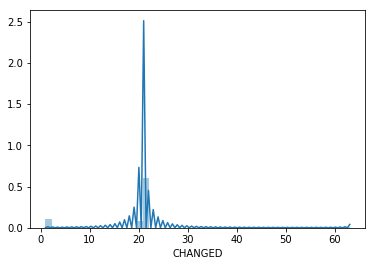

In [19]:
## show location wise
sns.distplot(data_prices['CHANGED'])

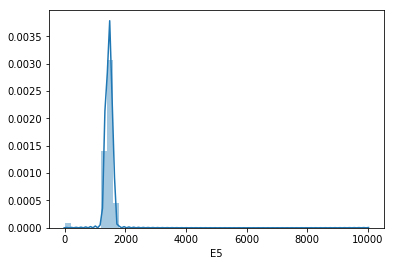

In [20]:
sns.distplot(data_prices['E5'])

In [ ]:
sns.distplot(data_prices['CHANGED'])

In [31]:
updated_data.shape

(4379052, 18)

In [32]:
updated_data.head(10)

,ID,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG,STID,E5,E10,DIESEL,DATE_CHANGED,CHANGED
0,d37bee76-91b6-485a-b974-24f1b0d391fa,4,2015-01-09 10:26:15.000000,Aral Tankstelle,ARAL,An der Tagweide,2,76139,Karlsruhe,\N,49.02028,8.459429,d37bee76-91b6-485a-b974-24f1b0d391fa,1369,1329,1219,2014-12-14 16:30:01.000000,63
1,d37bee76-91b6-485a-b974-24f1b0d391fa,4,2015-01-09 10:26:15.000000,Aral Tankstelle,ARAL,An der Tagweide,2,76139,Karlsruhe,\N,49.02028,8.459429,d37bee76-91b6-485a-b974-24f1b0d391fa,1409,1369,1269,2014-12-14 20:02:01.000000,21
2,d37bee76-91b6-485a-b974-24f1b0d391fa,4,2015-01-09 10:26:15.000000,Aral Tankstelle,ARAL,An der Tagweide,2,76139,Karlsruhe,\N,49.02028,8.459429,d37bee76-91b6-485a-b974-24f1b0d391fa,1409,1369,1269,2014-12-15 20:02:01.000000,21
3,d37bee76-91b6-485a-b974-24f1b0d391fa,4,2015-01-09 10:26:15.000000,Aral Tankstelle,ARAL,An der Tagweide,2,76139,Karlsruhe,\N,49.02028,8.459429,d37bee76-91b6-485a-b974-24f1b0d391fa,1399,1359,1259,2014-12-16 20:02:01.000000,21
4,d37bee76-91b6-485a-b974-24f1b0d391fa,4,2015-01-09 10:26:15.000000,Aral Tankstelle,ARAL,An der Tagweide,2,76139,Karlsruhe,\N,49.02028,8.459429,d37bee76-91b6-485a-b974-24f1b0d391fa,1379,1339,1239,2014-12-17 05:06:01.000000,21
5,d37bee76-91b6-485a-b974-24f1b0d391fa,4,2015-01-09 10:26:15.000000,Aral Tankstelle,ARAL,An der Tagweide,2,76139,Karlsruhe,\N,49.02028,8.459429,d37bee76-91b6-485a-b974-24f1b0d391fa,1379,1339,1239,2014-12-18 05:06:01.000000,21
6,d37bee76-91b6-485a-b974-24f1b0d391fa,4,2015-01-09 10:26:15.000000,Aral Tankstelle,ARAL,An der Tagweide,2,76139,Karlsruhe,\N,49.02028,8.459429,d37bee76-91b6-485a-b974-24f1b0d391fa,1489,1449,1329,2014-11-04 06:45:00.000000,21
7,d37bee76-91b6-485a-b974-24f1b0d391fa,4,2015-01-09 10:26:15.000000,Aral Tankstelle,ARAL,An der Tagweide,2,76139,Karlsruhe,\N,49.02028,8.459429,d37bee76-91b6-485a-b974-24f1b0d391fa,1479,1439,1309,2014-11-04 08:57:00.000000,21
8,d37bee76-91b6-485a-b974-24f1b0d391fa,4,2015-01-09 10:26:15.000000,Aral Tankstelle,ARAL,An der Tagweide,2,76139,Karlsruhe,\N,49.02028,8.459429,d37bee76-91b6-485a-b974-24f1b0d391fa,1509,1469,1339,2014-11-05 08:25:00.000000,21
9,d37bee76-91b6-485a-b974-24f1b0d391fa,4,2015-01-09 10:26:15.000000,Aral Tankstelle,ARAL,An der Tagweide,2,76139,Karlsruhe,\N,49.02028,8.459429,d37bee76-91b6-485a-b974-24f1b0d391fa,1499,1459,1329,2014-11-05 11:05:00.000000,21


In [33]:
data_stations.BRAND.unique()


array(['ARAL', 'JET', 'Supermarkt-Tankstelle am real- Markt',
       'Tankhof Iffezheim', 'Schiffer & Nicklaus GmbH', nan,
       'Sefrin Heizöl & Kraftstoffe', 'bft', 'Markant', 'AVIA',
       'nicht mehr aktiv', 'Bft', 'Freie Tankstelle',
       'AUTO ZOTZ Landau in der Pfalz   Tanken und waschen', 'HEM',
       'Fritz Walter GmbH', 'TAMOIL', 'Freie', 'rnt', '\\N',
       'Schuster & Sohn KG', 'Raiffeisen', 'E Center',
       'Eberhardt Jöhlingen', 'BFT', 'Agip', 'Winkler',
       'Mr. Wash Autoservice AG', 'ESSO', 'ZG Raiffeisen Energie',
       'Supermarkt-Tankstelle', 'freie Tankstelle', 'CLASSIC', 'Shell',
       'Supermarkt Tankstelle', 'Raiffeisen Tankstelle', 'Preis', 'mtb',
       'Tankcenter', 'TS ARNT', 'frei', 'OMV', 'Frühmesser GmbH', 'OIL!',
       'SB Markt', 'SB', 'TOTAL', 'ED', 'SB-Markttankstelle',
       'AUTO ZOTZ Herxheim b.LD.       Tanken an L.493', 'Total',
       'Markenfreie TS', 'TOP', 'T', 'ELAN', 'Tankstelle Heinz'], dtype=object)

In [35]:
data_stations.PLACE.unique()


array(['Karlsruhe', 'MANNHEIM', 'Kaiserslautern', 'KAISERSLAUTERN',
       'GERMERSHEIM', 'BAD DUERKHEIM', 'ALZEY', 'MUTTERSTADT', 'Iffezheim',
       'Grünstadt', 'Edenkoben', 'Bellheim', 'Herxheim',
       'Ludwigshafen-Oggersheim', 'Bobenheim-Roxheim', 'Mannheim',
       'Neustadt', 'Annweiler-Queichhambach', 'mehr aktiv', 'WORMS',
       'Karlsruhe-Knielingen', 'LANDAU', 'Jockgrim', 'Lampertheim-Hofheim',
       'Ludwigshafen', 'Oberhausen', 'Pirmasens', 'Klingenmünster',
       'Rodalben', 'Saalstadt', 'Schifferstadt', 'Rastatt', nan, 'Waldsee',
       'Steinweiler', 'Thaleischweiler-Fröschen', 'Bad Dürkheim',
       'Freckenfeld', 'Speyer', 'Bad Bergzabern', 'Landstuhl', 'Haßloch',
       'Westhofen', 'Frankenthal', 'Lampertheim', 'Dannstadt-Schauernhe',
       'Au am Rhein', 'Eppenbrunn', 'Kuppenheim', 'Phillipsburg',
       'Rheinstetten', 'Weilerbach', 'NEUSTADT', 'Queidersbach',
       'Joehlingen', 'Worms', 'Otterberg', 'Hochspeyer', 'Carlsberg',
       'Dettenheim-Liedolshe

In [24]:
data_stations.head(10)

,ID,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
0,d37bee76-91b6-485a-b974-24f1b0d391fa,4,2015-01-09 10:26:15.000000,Aral Tankstelle,ARAL,An der Tagweide,2,76139,Karlsruhe,\N,49.020280,8.459429
1,51d4b652-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET MANNHEIM UNTERMUEHLAUSTRASSE 83,JET,UNTERMUEHLAUSTRASSE 83,\N,68169,MANNHEIM,\N,49.508962,8.467691
2,c7caf231-0e47-40db-92de-9349a2eb2bef,4,2014-09-26 13:24:57.000000,Aral Tankstelle,ARAL,Trippstadter Straße,69,67663,Kaiserslautern,\N,49.433754,7.757465
3,51d4b53b-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET KAISERSLAUTERN PARISER STR. 167,JET,PARISER STR. 167,\N,67655,KAISERSLAUTERN,\N,49.442200,7.748360
4,51d4b70f-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET GERMERSHEIM MUENCHENER STRASSE 12,JET,MUENCHENER STRASSE 12,\N,76726,GERMERSHEIM,\N,49.226800,8.374400
5,51d4b5b9-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET BAD DUERKHEIM GUTLEUTSTR. 10,JET,GUTLEUTSTR. 10,\N,67098,BAD DUERKHEIM,\N,49.464100,8.177850
6,51d4b5c5-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:33.000000,Supermarkt-Tankstelle am real- Markt ALZEY FRI...,Supermarkt-Tankstelle am real- Markt,FRIEDRICHSTR. 15,\N,55232,ALZEY,\N,49.742900,8.107890
7,51d4b45d-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:33.000000,Supermarkt-Tankstelle am real- Markt MUTTERSTA...,Supermarkt-Tankstelle am real- Markt,AN DER FOHLENWEIDE 19,\N,67112,MUTTERSTADT,\N,49.425200,8.365010
8,00060458-0001-4444-8888-acdc00000001,5,2014-11-03 00:00:26.000000,Tankhof Iffezheim,Tankhof Iffezheim,Südring,19,76473,Iffezheim,\N,48.816753,8.157388
9,00060385-0001-4444-8888-acdc00000001,5,2014-11-03 00:00:29.000000,FREIE Tankstelle,Schiffer & Nicklaus GmbH,Kirchheimer Str.,45 A,67269,Grünstadt,\N,49.560261,8.169010
